In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('C:/Users/kapil.chavan/Downloads/train.csv')
test=pd.read_csv('C:/Users/kapil.chavan/Downloads/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.drop('PassengerId',axis=1,inplace=True)

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
null_percent = train.isnull().sum()/train.shape[0]*100
null_percent

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [10]:
col_for_drop = null_percent[null_percent > 20].keys()
train = train.drop(col_for_drop, "columns")
train.shape

C:\Users\KAPIL~1.CHA\AppData\Local\Temp/ipykernel_15788/2963370064.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop(col_for_drop, "columns")


(891, 10)

Numerical and Categorical Features Now, let's arrange the features of the dataset by their type... Here's my thought process behind this classification.

categorical_features: Features that a represent a category with no ordinal relationships between the variables.

ordinal_features: Features that represent a category with clear ordinal relationships between the variables, and so their relative order does matter for our analysis.

numerical_features: Features that have a numerical and continuous nature.

text_features: Features that are comprised of text data.

In [11]:
categorical_features = ['Sex','Embarked','SibSp','Parch']
ordinal_features = ['Pclass']
numerical_features = ['Age','Fare']
text_features = ['Name','Ticket']

Only 38.38% of the people in the train set survived!


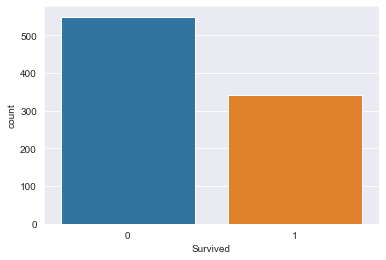

In [12]:
sns.set_style('darkgrid')
sns.countplot(data=train,x='Survived')
survival_rate = round((train['Survived'].value_counts()[1]/train['Survived'].count())*100,2)
print(f"Only {survival_rate}% of the people in the train set survived!")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

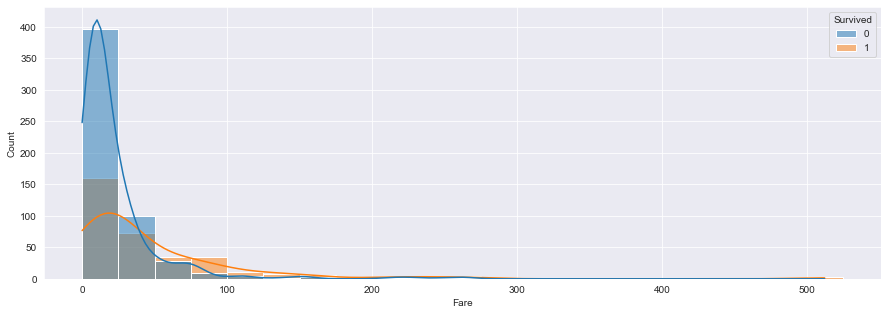

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(data=train,x='Fare',hue='Survived',kde=True,binwidth=25)

According to the graph, there seems to be a strong correlation between fare prices and survival rates. That is, the more a person paid for the ticket, the higher were his chances of survival.

<AxesSubplot:xlabel='Age', ylabel='Count'>

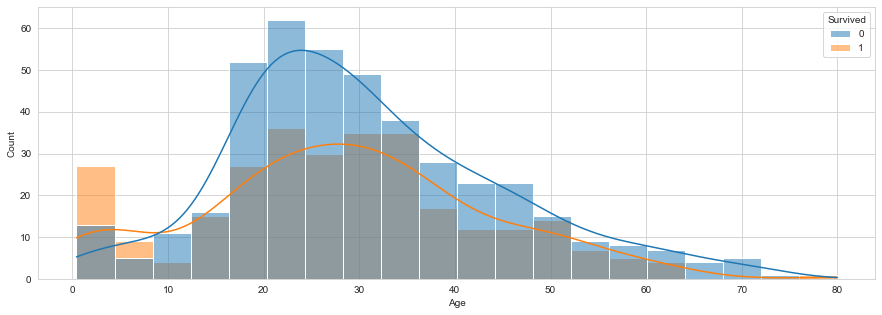

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.histplot(data=train,x='Age',hue='Survived',kde=True)

It seems that younger people had a higher chance of survival. However,we stil have close to 180 NaN age values... So let's see how NaN values relate to the survival rate.

In [15]:
train[train['Age'].isna() == True]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

For some reason, most of the people with missing age values have not survived the Titanic disaster...

Thus we can conclude that the missing values hold important information for our model since there is a strong correlation with the survival rate.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

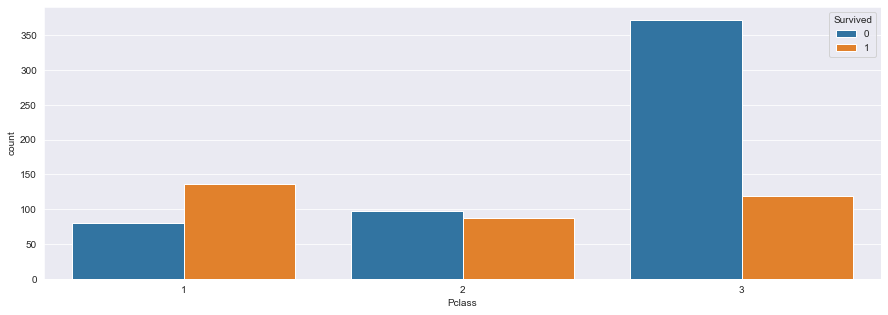

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.countplot(data=train,x='Pclass',hue='Survived')

According to the graph above, people that went on the cruise in higher classes had way higher chances of survival. With most people in the 1st class surviving, while in contrast, most people in the 3rd class died.

<AxesSubplot:xlabel='Sex', ylabel='count'>

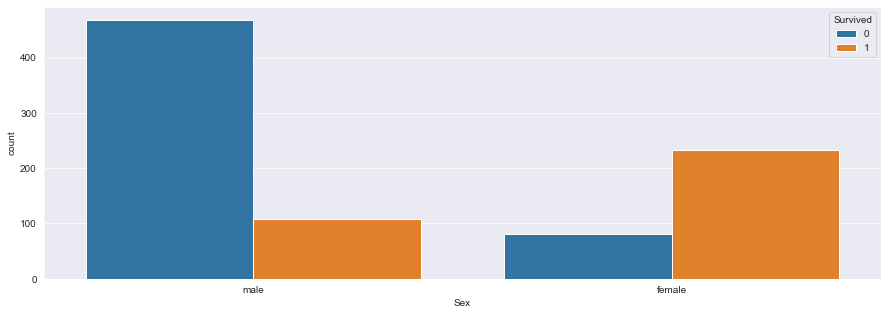

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=train,x='Sex',hue='Survived')

Well, turns out this "Women and Children First" policy was actually a thing, and our data clearly reflects that.

And since the vast majority of men died on this disaster, while most of the women managed to survive, we can only conclude that sex is an extremely important feature for our prediction model.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

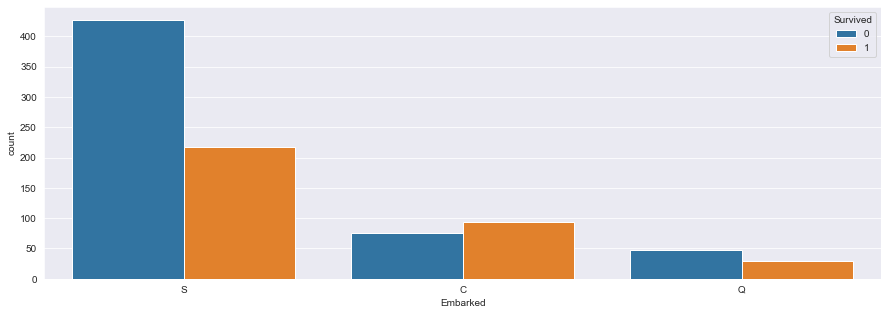

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=train,x='Embarked',hue='Survived')

Well, turns out that the port of embarkation also plays a role on a given person survival rate, and it seem like the people who embarked on the Cherbourg port were lucky enough to have the highest survival rates.

It seems fare and embarked have relation as per area of rich and poor.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

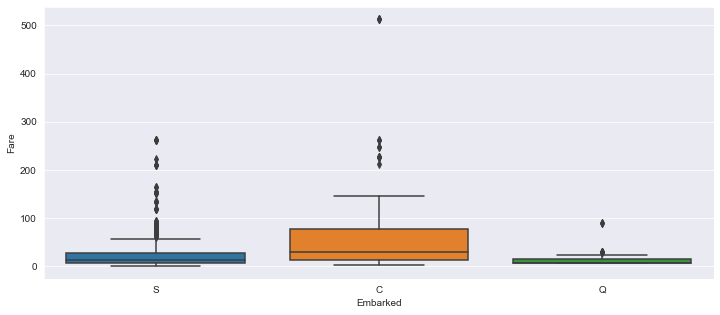

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(data=train,x='Embarked',y='Fare')

It seems like people who embarked on the Cherbourg port mostly paid high prices for the tickets. and that's why their survival rate is more.

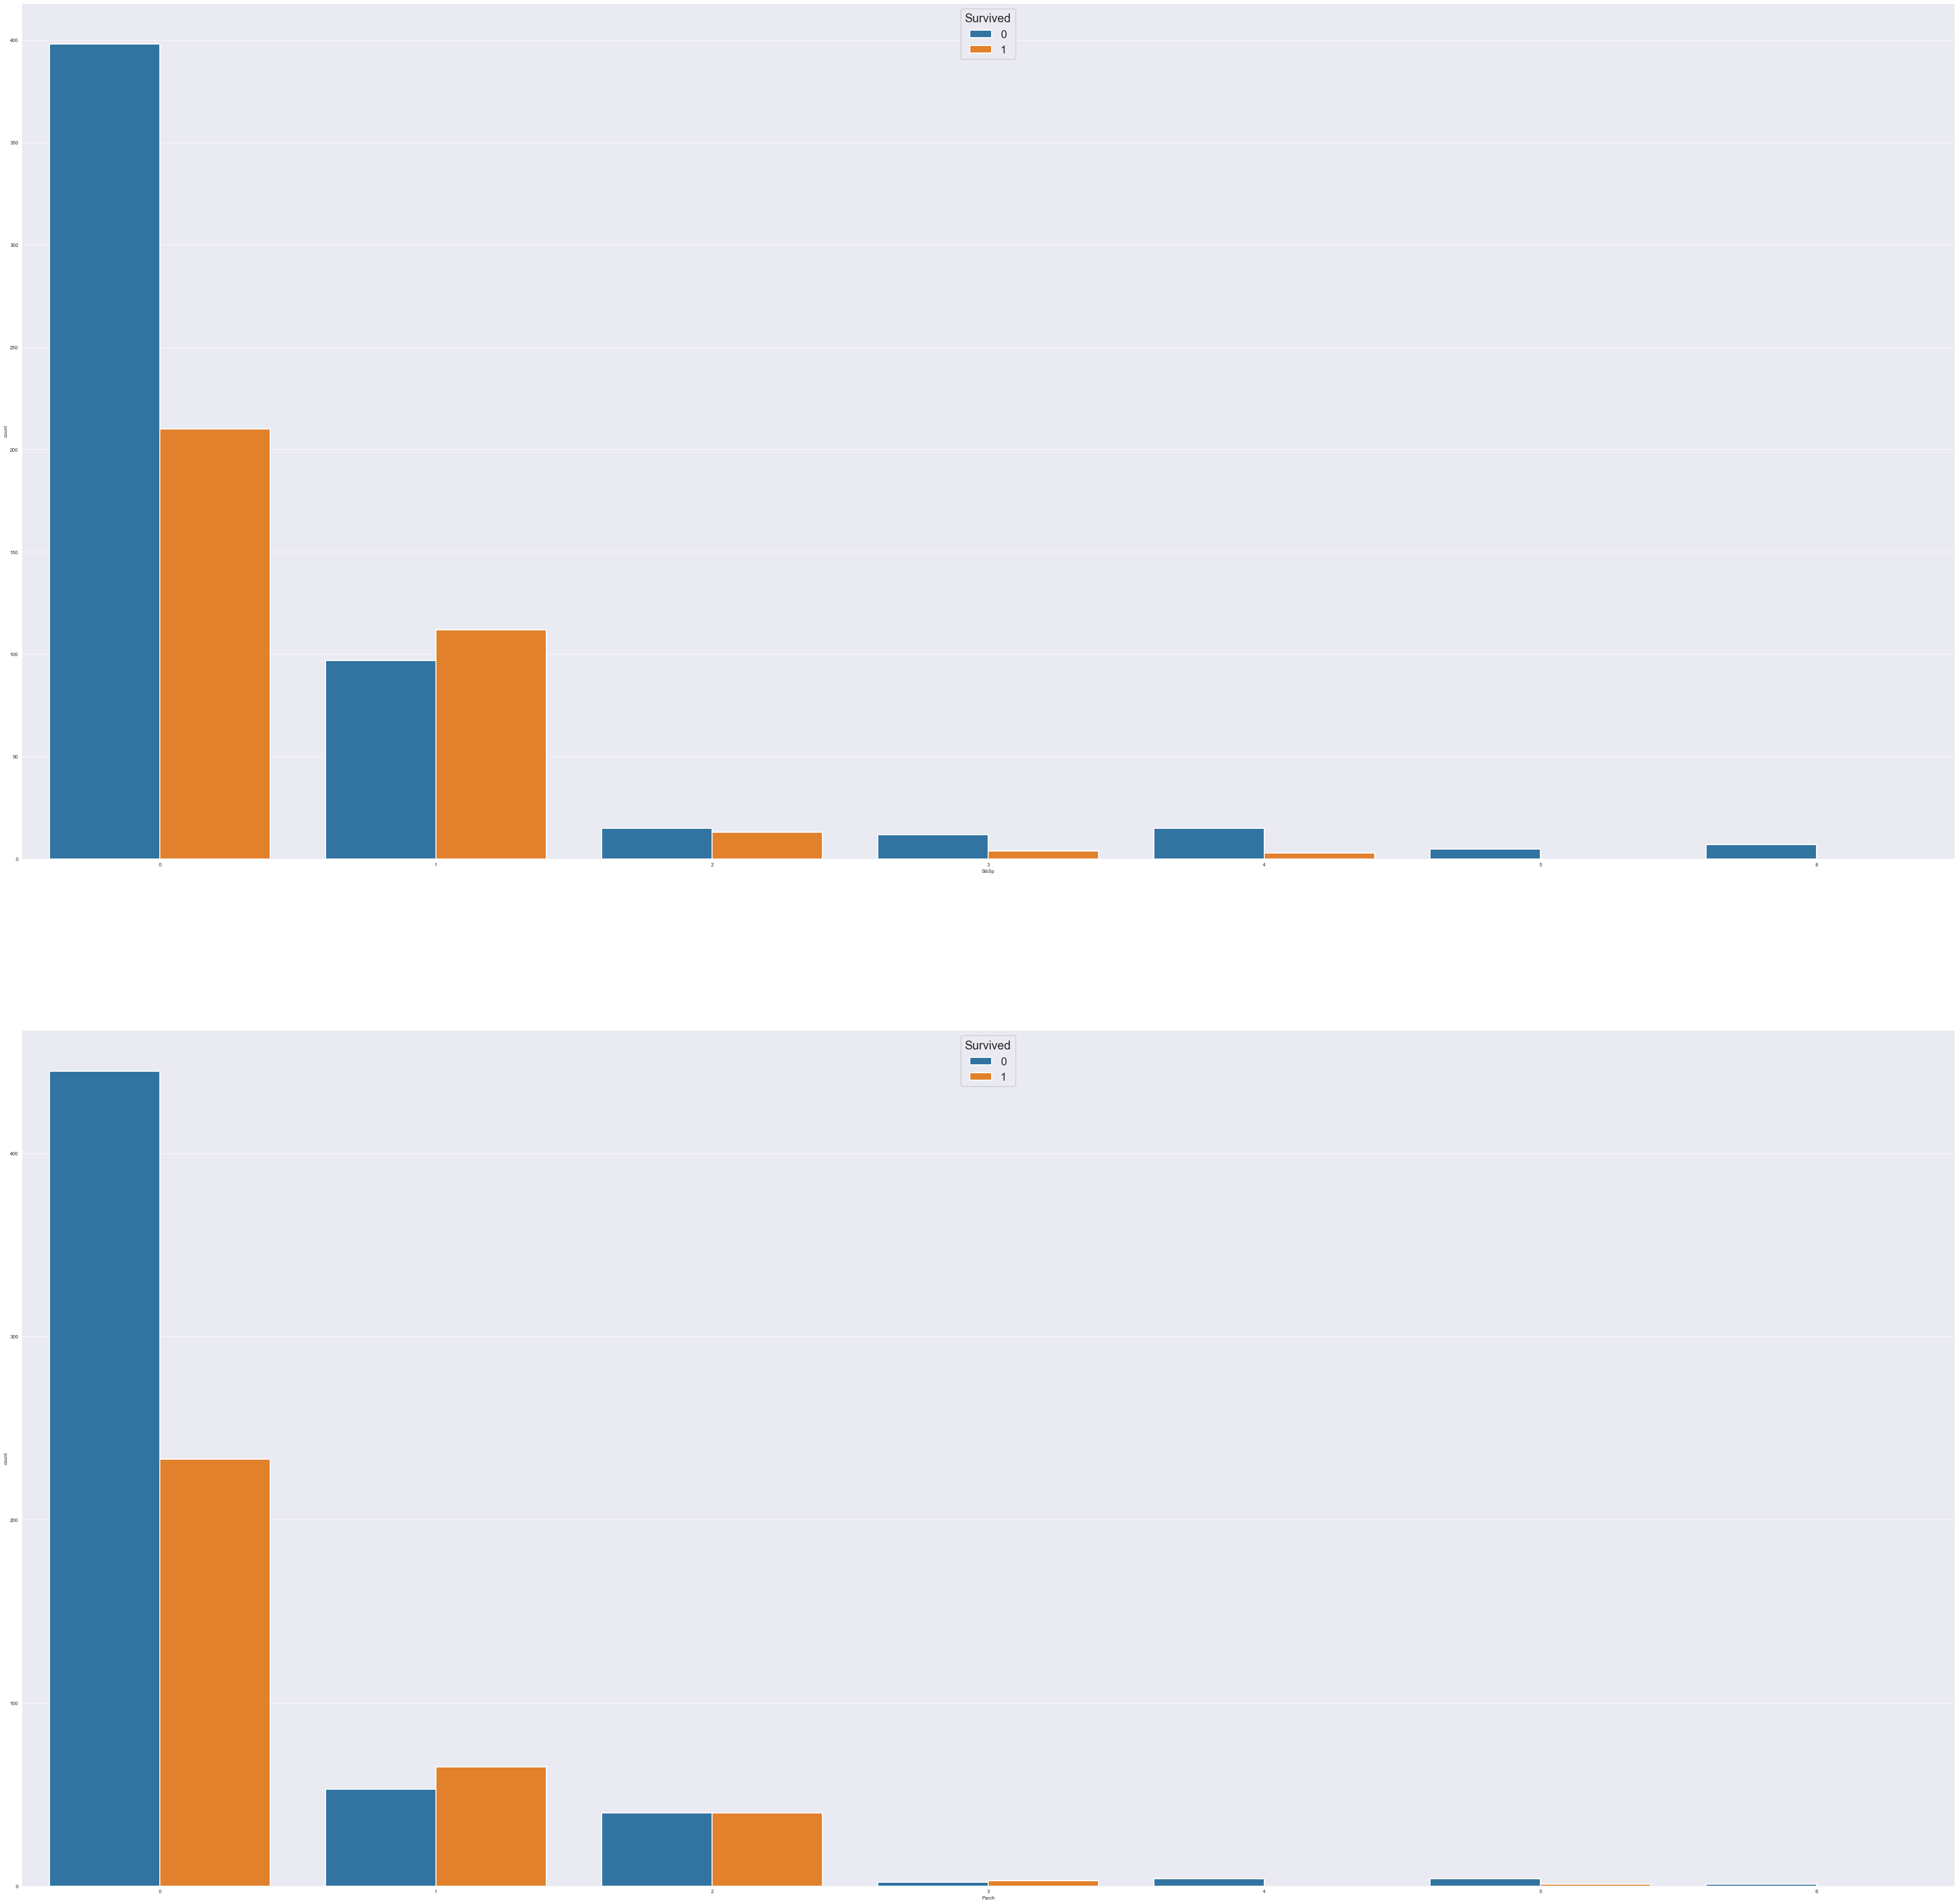

In [20]:
features_to_countplot = ['SibSp','Parch']
f, axs = plt.subplots(nrows=len(features_to_countplot),ncols=1,figsize=(70,70))
sns.set_context('poster',font_scale=1)
position = 0
for column in features_to_countplot:
    sns.countplot(data=train,x=column,hue='Survived',ax=axs[position])
    position = position + 1

It seems like people who went to the Titanic alone or with big families had the lowest chance of survival... While those who went with few people - but not alone - were likely to survive.
We can create feature according to family size.

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

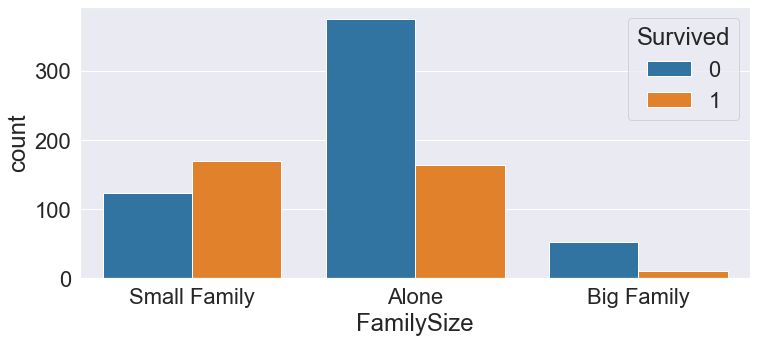

In [21]:
sns.set_context('notebook',font_scale=2)
plt.figure(figsize=(12,5))
train['FamilySize'] = train['Parch']+train['SibSp']
train['FamilySize'].replace(to_replace={0:'Alone',1:'Small Family',2:'Small Family',3:'Small Family',4:'Big Family',5:'Big Family',6:'Big Family',7:'Big Family',8:'Big Family',9:'Big Family',10:'Big Family'},inplace=True)
sns.countplot(data=train,x='FamilySize',hue='Survived')

As you could see, the data clearly reflects what we've just presumed

<AxesSubplot:xlabel='GroupSize', ylabel='count'>

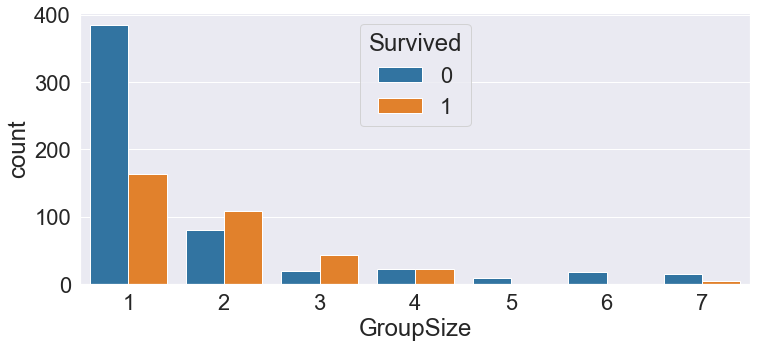

In [22]:
sns.set_context('notebook',font_scale=2)
plt.figure(figsize=(12,5))

train = train.merge(pd.DataFrame(train['Ticket'].value_counts()).reset_index().rename({'Ticket':'GroupSize','index':'Ticket'},axis=1),how='left',left_on='Ticket',right_on='Ticket')

sns.countplot(data=train,x='GroupSize',hue='Survived')

Group size is simillar feature as family size and reflects the same conclusions we made earlier.
As ticket shows same data as parch and sibsp we can remove it.

In [23]:
train.drop('Ticket',axis=1,inplace=True)

name of passenger is not important but title is effect on survived so we can extract title from name and drop name

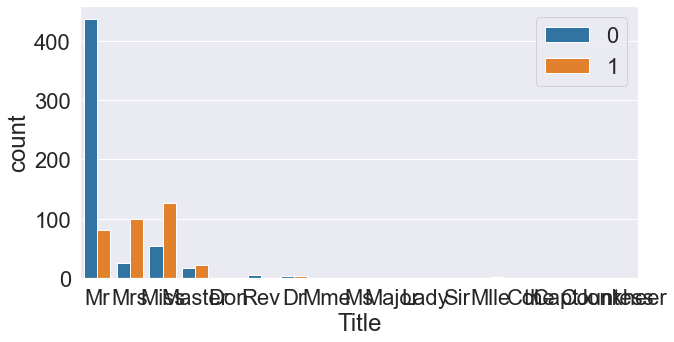

In [24]:
train["Title"] = train['Name'].apply(lambda x: x[x.find(',') : x.find('.')][1:].strip())
train['Title'].value_counts()
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=2)
sns.countplot(data=train,x='Title',hue='Survived',)
plt.legend(loc='upper right')

In [25]:
train.Embarked.fillna(train['Embarked'].mode()[0],inplace=True)

In [26]:
train.Age.fillna(train['Age'].mode()[0],inplace=True)

In [27]:
train.drop(['SibSp','Parch','Name'],axis=1,inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   FamilySize  891 non-null    object 
 7   GroupSize   891 non-null    int64  
 8   Title       891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 101.9+ KB


In [29]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,GroupSize,Title
0,0,3,male,22.0,7.2500,S,Small Family,1,Mr
1,1,1,female,38.0,71.2833,C,Small Family,1,Mrs
2,1,3,female,26.0,7.9250,S,Alone,1,Miss
3,1,1,female,35.0,53.1000,S,Small Family,2,Mrs
4,0,3,male,35.0,8.0500,S,Alone,1,Mr


In [30]:
object=train.select_dtypes(include='object')
object.columns

Index(['Sex', 'Embarked', 'FamilySize', 'Title'], dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()
for i in object.columns:
    train[i]=le.fit_transform(train[i])

In [33]:
catogery=train.select_dtypes('category')
for i in catogery.columns:
    train[i]=le.fit_transform(train[i])

In [34]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,GroupSize,Title
0,0,3,1,22.0,7.2500,2,2,1,11
1,1,1,0,38.0,71.2833,0,2,1,12
2,1,3,0,26.0,7.9250,2,0,1,8
3,1,1,0,35.0,53.1000,2,2,2,12
4,0,3,1,35.0,8.0500,2,0,1,11


In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
test["Title"] = test['Name'].apply(lambda x: x[x.find(',') : x.find('.')][1:].strip())
test['Title'].value_counts()
"""
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=2)
sns.countplot(data=train,x='Title',hue='Survived',)
plt.legend(loc='upper right')
"""

"\nplt.figure(figsize=(10,5))\nsns.set_context('notebook',font_scale=2)\nsns.countplot(data=train,x='Title',hue='Survived',)\nplt.legend(loc='upper right')\n"

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

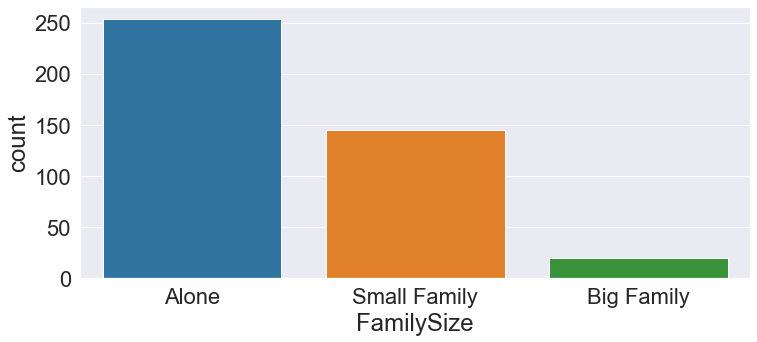

In [39]:
sns.set_context('notebook',font_scale=2)
plt.figure(figsize=(12,5))
test['FamilySize'] = test['Parch']+test['SibSp']
test['FamilySize'].replace(to_replace={0:'Alone',1:'Small Family',2:'Small Family',3:'Small Family',4:'Big Family',5:'Big Family',6:'Big Family',7:'Big Family',8:'Big Family',9:'Big Family',10:'Big Family'},inplace=True)
sns.countplot(data=test,x='FamilySize')

<AxesSubplot:xlabel='GroupSize', ylabel='count'>

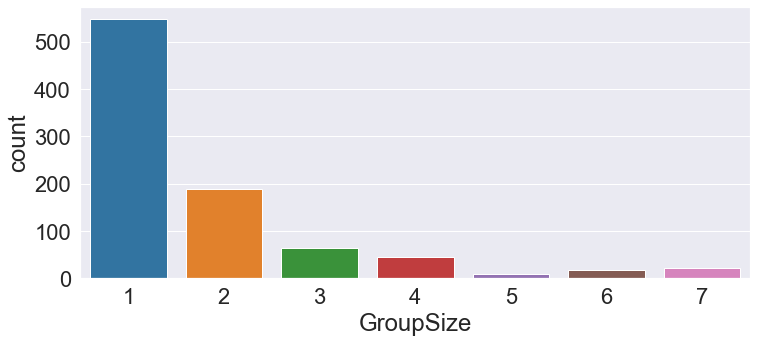

In [40]:
sns.set_context('notebook',font_scale=2)
plt.figure(figsize=(12,5))

test = test.merge(pd.DataFrame(test['Ticket'].value_counts()).reset_index().rename({'Ticket':'GroupSize','index':'Ticket'},axis=1),how='left',left_on='Ticket',right_on='Ticket')

sns.countplot(data=train,x='GroupSize')

In [41]:
test.Fare.fillna(train['Fare'].mode()[0],inplace=True)
test.Age.fillna(train['Age'].mode()[0],inplace=True)

In [42]:
test.drop('PassengerId',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)
test.drop(['SibSp','Parch','Name','Cabin'],axis=1,inplace=True)

In [43]:
object=test.select_dtypes(include='object')
object.columns

Index(['Sex', 'Embarked', 'Title', 'FamilySize'], dtype='object')

In [44]:
le=LabelEncoder()
for i in object.columns:
    train[i]=le.fit_transform(train[i])

In [45]:
catogery=train.select_dtypes('category')
for i in catogery.columns:
    train[i]=le.fit_transform(train[i])

In [46]:
test.isna().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
GroupSize     0
dtype: int64

In [47]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,GroupSize
0,3,male,34.5,7.8292,Q,Mr,Alone,1
1,3,female,47.0,7.0000,S,Mrs,Small Family,1
2,2,male,62.0,9.6875,Q,Mr,Alone,1
3,3,male,27.0,8.6625,S,Mr,Alone,1
4,3,female,22.0,12.2875,S,Mrs,Small Family,1


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X=train.iloc[:,1:]
y=train.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model_forest=RandomForestClassifier(n_estimators=100)
model_forest.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
model_forest.score(x_train,y_train)

0.9845505617977528

In [53]:
model_forest.score(x_test,y_test)

0.7821229050279329